In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'TransactionDate': 'nunique',
}).reset_index()

In [11]:
customer_profiles = customers.merge(customer_transactions, on='CustomerID', how='left')
customer_profiles.fillna(0, inplace=True)


In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity', 'Price', 'TransactionDate']])


In [13]:
# Apply KMeans clustering with different numbers of clusters (from 2 to 10)
db_scores = []  # List to store DB Index scores for different k values
inertia = []    # List to store inertia values (for elbow method)

for k in range(2, 11):  # Trying different k values
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    # Store the Davies-Bouldin index for evaluation
    db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
    db_scores.append(db_score)

    # Store inertia for the elbow method
    inertia.append(kmeans.inertia_)

# Determine the optimal number of clusters (based on DB Index and elbow method)
optimal_k = np.argmin(db_scores) + 2  # The index of the minimum DB score + 2 (as k starts from 2)
print(f"Optimal number of clusters: {optimal_k}")


Optimal number of clusters: 2


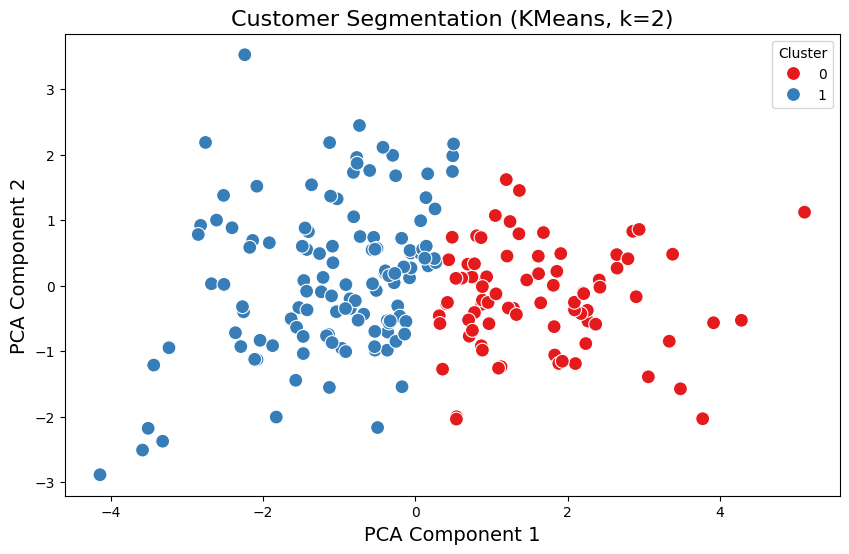

In [14]:
# Fit KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_data)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=customer_profiles['Cluster'], palette='Set1', s=100)
plt.title(f'Customer Segmentation (KMeans, k={optimal_k})', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [15]:
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_kmeans.fit(scaled_data)
db_index = davies_bouldin_score(scaled_data, optimal_kmeans.labels_)
print(f"Davies-Bouldin Index (DBI): {db_index:.4f}")


Davies-Bouldin Index (DBI): 0.9518


In [16]:
#Final results
print(f"Optimal number of clusters: {optimal_k}")
print(f"Davies-Bouldin Index (DBI): {db_index:.4f}")

#Clustering mertrics
print("Other Clustering metrics:")
print("Inertia values for different k:")
for k, inertia_value in zip(range(2, 11), inertia):
    print(f"k={k}: {inertia_value:.2f}")
from sklearn.metrics import silhouette_score

# silhouette score for the optimal k
silhouette_avg = silhouette_score(scaled_data, optimal_kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Optimal number of clusters: 2
Davies-Bouldin Index (DBI): 0.9518
Other Clustering metrics:
Inertia values for different k:
k=2: 443.66
k=3: 337.23
k=4: 261.08
k=5: 216.26
k=6: 190.34
k=7: 175.52
k=8: 149.20
k=9: 143.77
k=10: 127.62
Silhouette Score: 0.3835
